# Assignment 3: numpy

This assignment is about slicing and plotting.

### How to hand in
The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. Remember her to use the link provided when first registering your notebook with mybinder (not the url taken from your browsers adress field). See the notebook `12-Assignments` for more information.


## Create jupyter notebook with 4 data illustrations


1. First create a file with your python module. This is where you should put your functions to be used in the notebook.

In [1]:
import ex3_module as mod

2. Second create a function to read the csv file containing Copenhagen city population data and return a numpy array (numpy.ndarray). **hint:** use `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)` as in the slides

In [2]:
data = mod.import_data()

3. Third create a function that can extract the number of all the citizens from native english speaking countries and from non english speaking countries. How many are there of each? (**hint** remember that with python you can return multiple values from a function).

In [3]:
mod.devide_nation(data)

{'eng_sum': 9053, 'non_eng_sum': 571242}

4. Now create another function that can take 2 arguments: 
  - 1: the dataset in the form of a 2dimensional data array where y=data rows and x=[year, area, age nationality, amount].
  - 2: the mask in the form: data[:,3] == 5120 to find swedish or data[:,0] == 1999 to filter on year
  - the return value must be the filtered dataset.

In [4]:
#mask to test
mask1 = (data[:,3] == 5120) & (data[:,0] == 1999)

print(mod.filter(data, mask1))

[[1999    1    0 5120    1]
 [1999    1    1 5120    5]
 [1999    1    2 5120    6]
 ...
 [1999   99   53 5120    2]
 [1999   99   56 5120    1]
 [1999   99   57 5120    1]]


5. Create another function that can take 2 arguments:
  - a dataset with same characteristics as above and
  - a value for the x-axis (either year, area, age or nationality)
  - return value should be the accumulated population for all x-values.
  - **hint:** if year is chosen for x then y is all accumulated amounts from all areas, ages and nationalities.

In [5]:
#wierd explaination of the exercise

#Enum is just for the lols ;-)
class Topics:
    YEAR = 0
    AREA = 1
    AGE = 2
    NATIONALITY = 3
    AMOUNT = 4

mod.topic_sum(data, Topics.AREA)

4765256

6. Create Illustration 1: In your notebook use the above function and create a 2d array of year as x and accumulated amount as y:
  - create a line graph of the population change over time for all of Copenhagen

[[ 30200712  31441568  32930910  35044170  37438972  39928018  41484474
   42110934  43426000  43903941  44274230  44444567  45015852  45453350
   45989556  46726974  48957048  51430400  52991640  55187873  55243484
   56388156  57950836  59621835]
 [   131596    128968    133354    158476    171388    185219    193696
     177141    194463    197322    177961    182630    189739    202862
     204068    199284    222403    241725    249355    268123    228456
     235218    240664    251145]
 [   512023    532534    557521    590760    629188    669882    700084
     713698    738942    752771    764204    773634    790968    804065
     819429    838094    879113    923358    952091    992807    997540
    1021659   1052134   1081782]
 [ 79524255  82854156  86846297  92503477  99038665 105708489 109873662
  111566268 115083832 116317441 117266396 117668279 119147114 120253022
  121627476 123542850 129434842 135971684 140069984 145828975 145933292
  148903786 153011061 157394911]
 [  

<IPython.core.display.Javascript object>


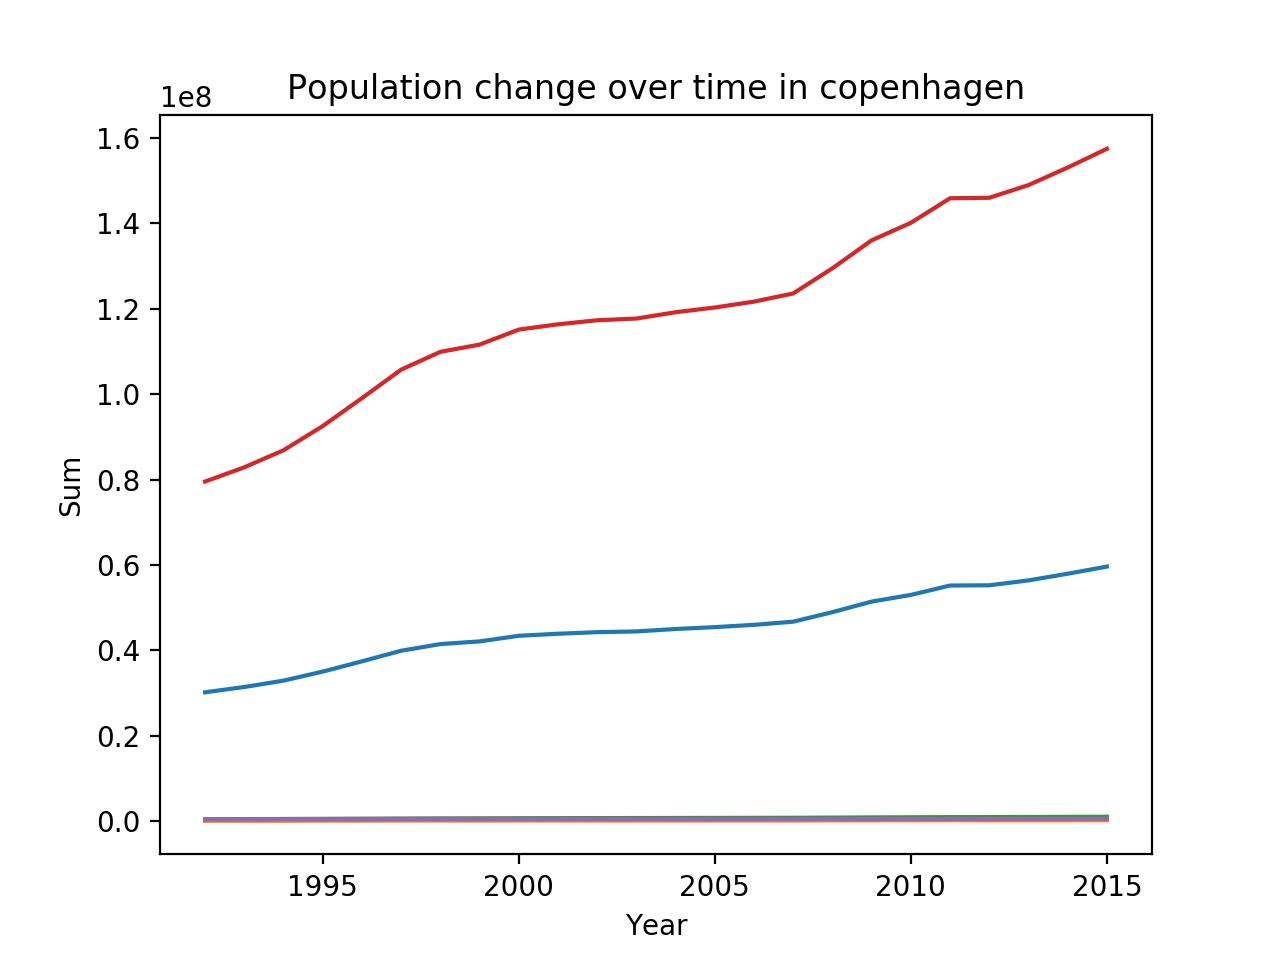

In [6]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

all_years = set(data[:,0])



#creating list for results on the y-axis
topic_values = []

#iterating all topics in the data
for topic in range(0,5):
    #creating list for results on the x-axis
    year_values = []
    
    for year in all_years:
        #Getting all the year specific data
        year_data = data[mod.year_mask(data, year)]
        
        #Getting the topic sum of the year data
        year_topic_sum = mod.topic_sum(year_data,topic)
        
        #Adding on the x-axis (year_values)
        year_values.append(year_topic_sum)
        
    #Adding on the y-axis (topic_values)
    topic_values.append(year_values)

#finally converting the list to a numpy array
np_2d_array = np.array(topic_values) 

print(np_2d_array)

#plotting results
for topic in range(0,5):
    plt.plot(list(all_years), topic_values[topic])
plt.xlabel("Year")
plt.ylabel("Sum")
plt.title("Population change over time in copenhagen")
plt.show()

7. Create illustration 2: In your notebook use your module to create a dataset where development of all German citizens can be shown over time


<IPython.core.display.Javascript object>


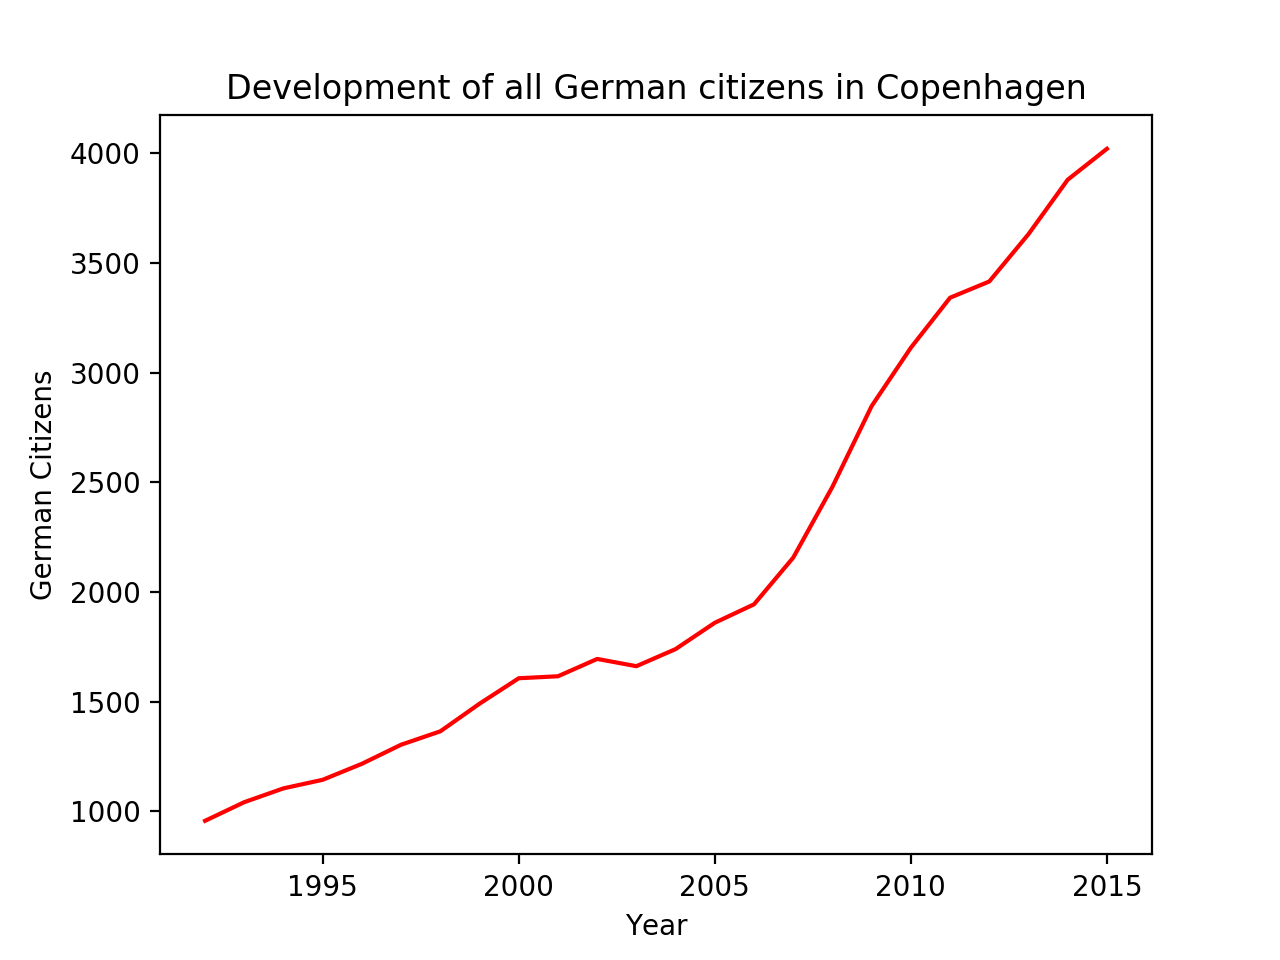

In [7]:
%matplotlib notebook

german_dict = mod.german_development(data)

#plotting
plt.plot(german_dict.keys(), german_dict.values(), "r")
plt.title("Development of all German citizens in Copenhagen")
plt.xlabel("Year")
plt.ylabel("German Citizens");

8. Create illustration 3: Show a bar plot of all the 18-25 year old in the different areas of copenhagen and in the same plot show (in a different color) all 60-67 year old in the different areas.

<IPython.core.display.Javascript object>


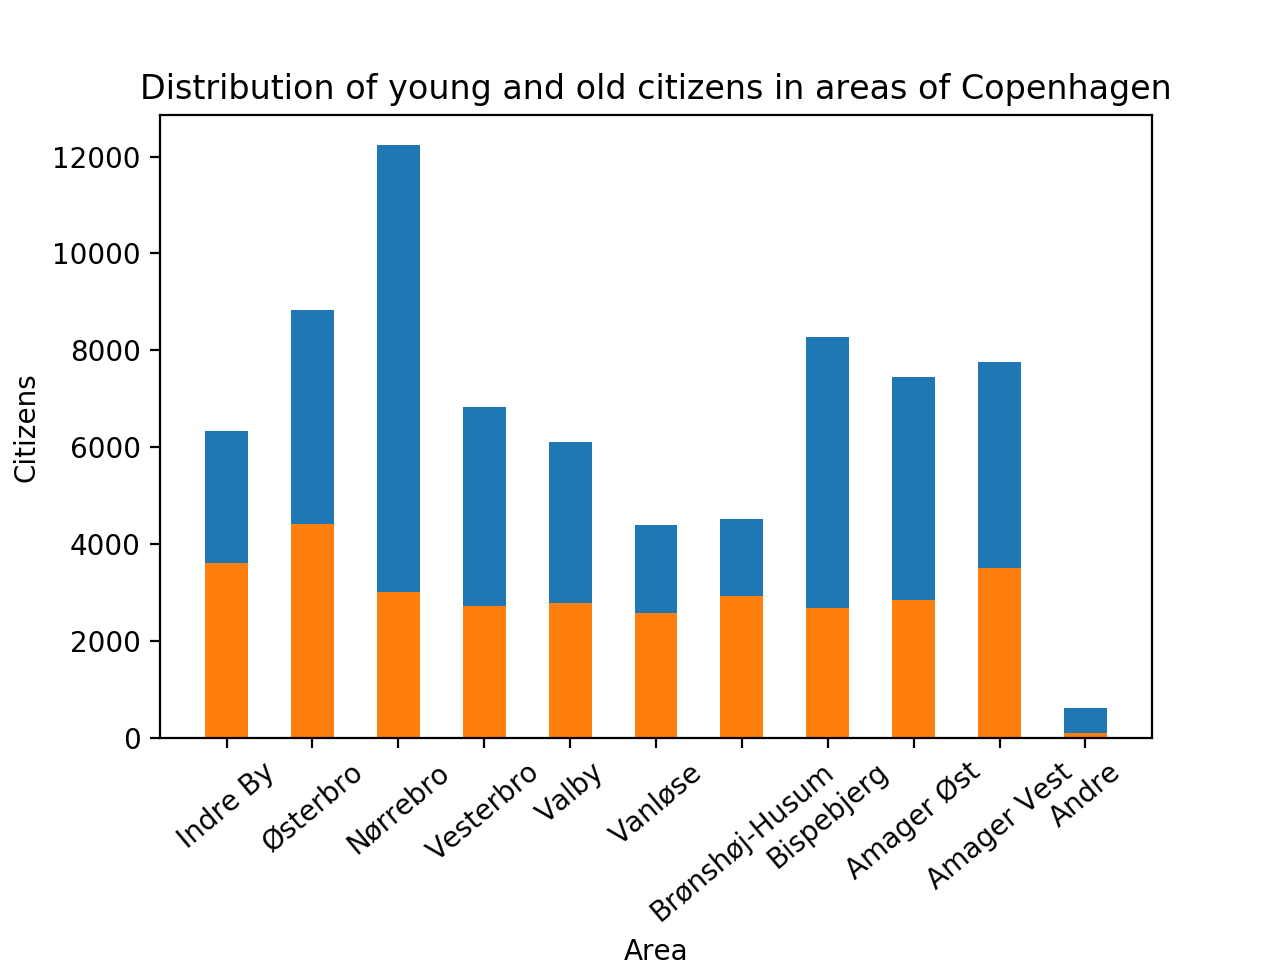

In [8]:
%matplotlib notebook

year_of_interest = 2015

#Getting list of all areas
all_areas = list(set(data[:,1]))

young_sums = []
old_sums = []

for area in all_areas:
    #creating masks restricting min age, max age, area and year
    young_mask = (data[:,2] >= 18) & (data[:,2] < 25) & (data[:,1] == area) & (data[:,0] == year_of_interest)
    old_mask = (data[:,2] >= 60) & (data[:,2] < 67) & (data[:,1] == area) & (data[:,0] == year_of_interest)
    
    #adding sums on the respective lists
    young_sums.append(np.sum(data[young_mask][:,-1]))
    old_sums.append(np.sum(data[old_mask][:,-1]))
    

#plotting
labels = ["Indre By", "Østerbro", "Nørrebro", "Vesterbro", "Valby", "Vanløse", "Brønshøj-Husum", "Bispebjerg", "Amager Øst", "Amager Vest", "Andre"]
plt.bar(labels, young_sums, width=0.5, align='center')
plt.bar(labels, old_sums, width=0.5, align='center')
plt.xticks(labels, labels, rotation="40")
plt.subplots_adjust(bottom=0.231)
plt.title("Distribution of young and old citizens in areas of Copenhagen");
plt.ylabel("Citizens")
plt.xlabel("Area");

9. Create illustration 4: show a pie chart of age groups (0-10, 10-20, 20-30 ...) in Østerbro part of Copenhagen. create another similar piechart for Vesterbro.

In [9]:
#im using pygal for this exercise - look at instructions below!
import pygal

year_of_interest = 2015

#getting min and max ages
ages = data[:,2]
age_min = min(ages)
age_max = max(ages)

#generating age ranges
age_ranges = [(x, x + 10) for x in range(age_min, int(age_max) + 1, 10)]

def creat_pie_chart(area):
    age_sums = []
    
    for age_range in age_ranges:
        #creating mask restricting to area, min age and max age
        mask = (data[:,1] == area) & (data[:,2] >= age_range[0]) & (data[:,2] < age_range[1])
        
        #appending the sums to age sum list
        age_sums.append(np.sum(data[mask][:,-1]))
    
    #plotting
    age_ranges_str = [f"{age_range[0]} - {age_range[1]}" for age_range in age_ranges]
    pie_chart = pygal.Pie()
    pie_chart.title = f"Age groups in area {area} of Copenhagen"
    for i in range(len(age_ranges)):
        range_str = f"{age_ranges[i][0]} - {age_ranges[i][1]}"
        pie_chart.add(range_str, age_sums[i])
    
    #saving the pie as svg
    pie_chart.render_to_file(f"./pie_chart_area_{area}.svg")
    
    
#Østerbro
creat_pie_chart(2)
#Vesterbro
creat_pie_chart(4)


# ``INFO! ``

To **view the svg files** generated above, follow these steps:
1. go to the file explorer in jupyter by pressing the jupyter icon
2. open the desired svg file
3. copy the svg code and paste it into the **Code** field at [this link](https://www.freecodeformat.com/svg-editor.php) and press the **Draw** button